In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/mohamedberrimi/oct-images-balanced-version")

Skipping, found downloaded files in ".\oct-images-balanced-version" (use force=True to force download)


In [10]:
!pip install livelossplot

     ---------------------------------------- 16.5/16.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00


In [1]:
import tensorflow as tf
import numpy as np
from keras.applications import imagenet_utils
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
# from livelossplot import PlotLossesKerasTF
# import tensorflow_addons as tfa

tfds.disable_progress_bar()

In [2]:
tf.test.is_gpu_available(
                 cuda_only = True, min_cuda_compute_capability = (3,1) )

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/GPUSW1/Desktop/oct-images-balanced-version/OCT_Balanced_Version/Balanced',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/GPUSW1/Desktop/oct-images-balanced-version/test/test',
    shuffle = False,
    image_size = (256, 256),
    batch_size = 32,
)

Found 32064 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [10]:
def data_partition(data, train_split = 0.9, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds = len(data)
    if shuffle:
        data = data.shuffle(shuffle_size, seed = 23)

    train_size = int(train_split * ds)
    val_size = int(val_split * ds)

    train_data = data.take(train_size)
    val_data = data.skip(train_size)

    return train_data, val_data

In [11]:
train_data, val_data = data_partition(dataset)
print(f"{len(train_data)},{len(val_data)}")

901,101


In [5]:
from tensorflow import keras
model = keras.models.load_model('mobile-vit-xxs')

In [6]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_84 (Conv2D)             (None, 128, 128, 16  448         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                            

 add_64 (Add)                   (None, 64, 64, 24)   0           ['batch_normalization_71[0][0]', 
                                                                  'batch_normalization_68[0][0]'] 
                                                                                                  
 conv2d_91 (Conv2D)             (None, 64, 64, 48)   1152        ['add_64[0][0]']                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 64, 64, 48)  192         ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.silu_48 (TFOpLambda)     (None, 64, 64, 48)   0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 depthwise

                                                                                                  
 add_68 (Add)                   (None, 4, 256, 64)   0           ['multi_head_attention_28[0][0]',
                                                                  'add_67[0][0]']                 
                                                                                                  
 layer_normalization_57 (LayerN  (None, 4, 256, 64)  128         ['add_68[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 dense_59 (Dense)               (None, 4, 256, 128)  8320        ['layer_normalization_57[0][0]'] 
                                                                                                  
 dropout_56 (Dropout)           (None, 4, 256, 128)  0           ['dense_59[0][0]']               
          

 HeadAttention)                                                   'layer_normalization_60[0][0]'] 
                                                                                                  
 add_72 (Add)                   (None, 4, 64, 80)    0           ['multi_head_attention_30[0][0]',
                                                                  'add_71[0][0]']                 
                                                                                                  
 layer_normalization_61 (LayerN  (None, 4, 64, 80)   160         ['add_72[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 dense_63 (Dense)               (None, 4, 64, 160)   12960       ['layer_normalization_61[0][0]'] 
                                                                                                  
 dropout_6

                                                                                                  
 depthwise_conv2d_27 (Depthwise  (None, 8, 8, 160)   1440        ['zero_padding2d_15[0][0]']      
 Conv2D)                                                                                          
                                                                                                  
 batch_normalization_82 (BatchN  (None, 8, 8, 160)   640         ['depthwise_conv2d_27[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 tf.nn.silu_55 (TFOpLambda)     (None, 8, 8, 160)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 conv2d_106 (Conv2D)            (None, 8, 8, 80)     12800       ['tf.nn.silu_55[0][0]']          
          

                                                                                                  
 dropout_71 (Dropout)           (None, 4, 16, 96)    0           ['dense_74[0][0]']               
                                                                                                  
 add_83 (Add)                   (None, 4, 16, 96)    0           ['dropout_71[0][0]',             
                                                                  'add_82[0][0]']                 
                                                                                                  
 reshape_23 (Reshape)           (None, 8, 8, 96)     0           ['add_83[0][0]']                 
                                                                                                  
 conv2d_109 (Conv2D)            (None, 8, 8, 80)     7760        ['reshape_23[0][0]']             
                                                                                                  
 concatena

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
learning_rate = 0.0003
label_smoothing_factor = 0.1
epochs = 40

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
checkpoint_filepath = "C:/Users/GPUSW1/Desktop/sample_data/checkpoint"
checkpoint = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr=0.00001, mode = 'auto')
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr ]

In [ ]:
!pip install

In [13]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

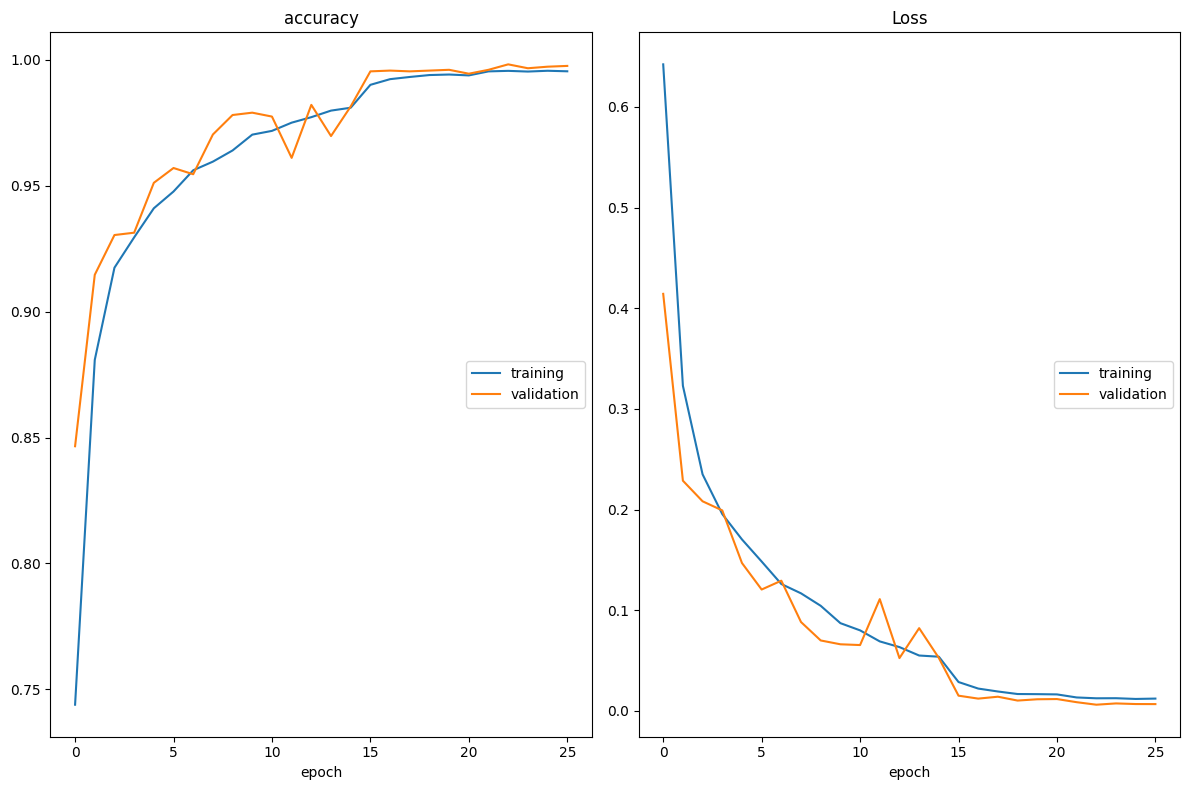

accuracy
	training         	 (min:    0.744, max:    0.996, cur:    0.995)
	validation       	 (min:    0.847, max:    0.998, cur:    0.998)
Loss
	training         	 (min:    0.012, max:    0.642, cur:    0.012)
	validation       	 (min:    0.006, max:    0.414, cur:    0.007)
901/901 [==============================] - 213s 220ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0068 - val_accuracy: 0.9975 - lr: 1.0000e-05
Epoch 27/40
802/901 [=========================>....] - ETA: 19s - loss: 0.0112 - accuracy: 0.9959

KeyboardInterrupt: 

In [14]:
model_1 = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    verbose = 1,
                    callbacks = callbacks,
                    )

In [15]:
loss, accuracy = model.evaluate(test_dataset)

31/31 [==============================] - 3s 81ms/step - loss: 0.0522 - accuracy: 0.9886


In [16]:
model.save('oct_classifynew.h5')

In [18]:
model_json = model.to_json()
with open('modelnew.json', 'w') as json_file:
    json_file.write(model_json)

In [19]:
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']

NameError: name 'model_1' is not defined

ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

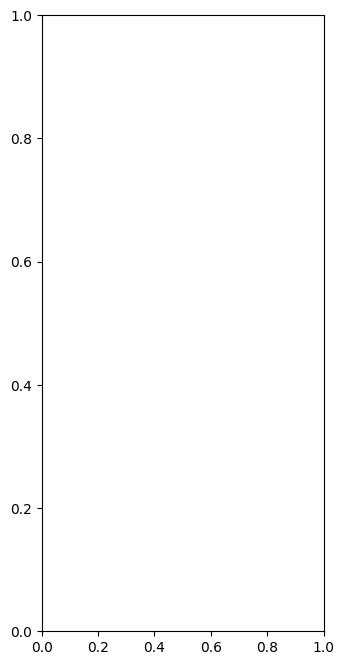

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
EPOCHS = 15
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

['CNV', 'DME', 'DRUSEN', 'NORMAL']
1/1 [==============================] - 0s 47ms/step


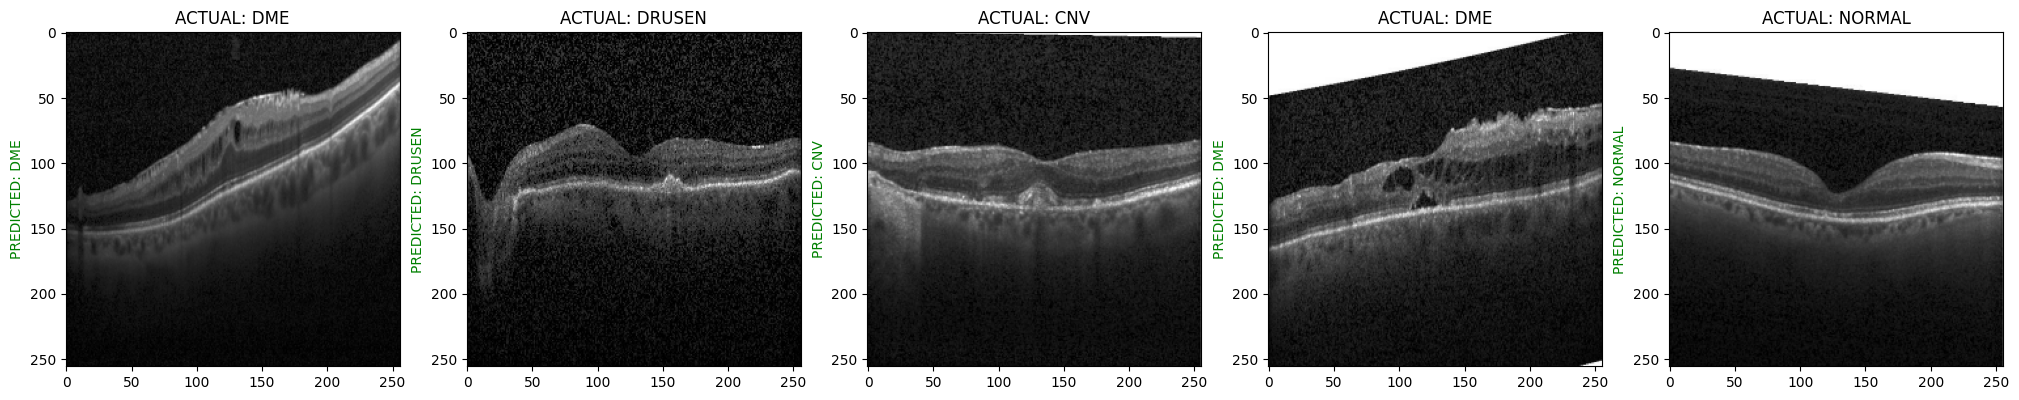

In [22]:
plt.figure(figsize = (25, 25))
CLASSES = dataset.class_names
print(CLASSES)
import numpy as np
for images, labels in train_data.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
    
        plt.imshow(images[i].numpy().astype('uint8'))
        pred = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(pred[0])
        if(CLASSES[labels[i]] == CLASSES[np.argmax(score)]):
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'green'})
        else:
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'red'})

31/31 [==============================] - 5s 71ms/step


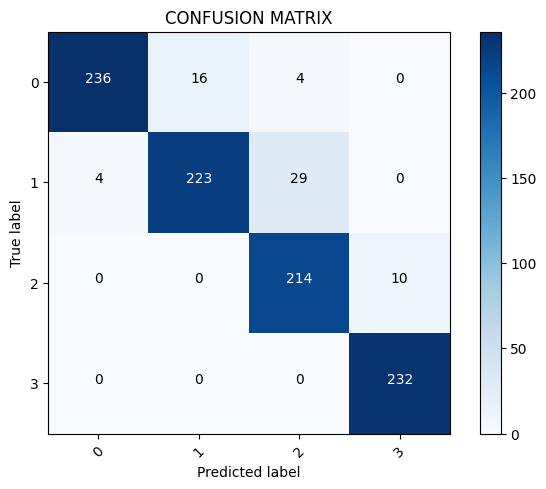

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

#making a confusion matrixes
def plot_cm(cm, classes, normalize = False, title = 'CONFUSION MATRIX', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)

y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())

# y_true = np.argmax(dataset)
# print(y_true)

confusion_mtx = confusion_matrix(y_val, y_pred_class) 

plot_cm(confusion_mtx, classes = range(4))

In [24]:
from sklearn.metrics import f1_score
y_pred = model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)
y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())
    
    
f1_score(y_val, y_pred_class, average = 'macro')    
f1_score(y_val, y_pred_class, average = None)    

31/31 [==============================] - 2s 72ms/step


array([0.9516129 , 0.9010101 , 0.90870488, 0.97890295])

In [ ]:
import graphviz
import pydot_ng
import pydotplus

In [ ]:
plot_model(model,     
                          to_file="model.png",
)

In [ ]:
!pip install pydot-ng
!pip install graphviz
!pip install pydotplus


In [ ]:
!pip install visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(model)